# Introduction

Filtering data from a dataset is one of the most common and basic operations. There are numerous ways to filter (or subset) data in pandas with boolean indexing. Boolean indexing (also known as boolean selection) can be a confusing term, but for the purposes of pandas, it refers to selecting rows by providing a boolean value (True or False) for each row. These boolean values are usually stored in a Series or NumPy ndarray and are usually created by applying a boolean condition to one or more columns in a DataFrame. We begin by creating boolean Series and calculating statistics on them and then move on to creating more complex conditionals before using boolean indexing in a wide variety of ways to filter data.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

%matplotlib inline

# Calculating boolean statistics

When first getting introduced to boolean Series, it can be informative to calculate basic summary statistics on them. Each value of a boolean series evaluates to 0 or 1 so all the Series methods that work with numerical values also work with booleans.

### Getting ready

In this recipe, we create a boolean Series by applying a condition to a column of data and then calculate summary statistics from it.

### How to do it...

Read in the movie dataset, set the index to the movie title, and inspect the first few rows:

In [2]:
pd.options.display.max_columns = 50

movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Determine whether the duration of each movie is longer than two hours by using the greater than comparison operator with the duration Series:

In [3]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

We can now use this Series to determine the number of movies that are longer than two hours:

In [4]:
movie_2_hours.sum()

1039

To find the percentage of movies in the dataset longer than two hours, use the mean method:

In [5]:
movie_2_hours.mean()

0.2113506916192026

Unfortunately, the output from step 4 is misleading. The duration column has a few missing values. If you look back at the DataFrame output from step 1, you will see that the last row is missing a value for duration. The boolean condition in step 2 returns False for this. We need to drop the missing values first, then evaluate the condition and take the mean:

In [6]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

Use the describe method to output a few summary statistics on the boolean Series:

In [7]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

Most DataFrames will not have columns of booleans like our movie dataset. The most straightforward method to produce a boolean Series is to apply a condition to one of the columns using one of the comparison operators. In step 2, we use the greater than operator to test whether or not the duration of each movie was more than two hours (120 minutes). Steps 3 and 4 calculate two important quantities from a boolean Series, its sum and mean. These methods are possible as Python evaluates False/True as 0/1.

You can prove to yourself that the mean of a boolean Series represents the percentage of True values. To do this, use the value_counts method to count with the normalize parameter set to True to get its distribution:

In [8]:
movie_2_hours.value_counts() / movie_2_hours.size

duration
False    0.788649
True     0.211351
Name: count, dtype: float64

In [10]:
movie_2_hours.value_counts(normalize = True) #Same can be donw using normalize =True

duration
False    0.788649
True     0.211351
Name: proportion, dtype: float64

Step 5 alerts us to the incorrect result from step 4. Even though the duration column had missing values, the boolean condition evaluated all these comparisons against missing values as False. Dropping these missing values allows us to calculate the correct statistic. This is done in one step through method chaining.

Step 6 shows that pandas treats boolean columns similarly to how it treats object data types by displaying frequency information. This is a natural way to think about boolean Series, rather than display quantiles like it does with numeric data.

### There's more...

It is possible to compare two columns from the same DataFrame to produce a boolean Series. For instance, we could determine the percentage of movies that have actor 1 with more Facebook likes than actor 2. To do this, we would select both of these columns and then drop any of the rows that had missing values for either movie. Then we would make the comparison and calculate the mean:



In [11]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna() #drop all missing values
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

# Constructing multiple boolean conditions

In Python, boolean expressions use the built-in logical operators and, or, and not. These keywords do not work with boolean indexing in pandas and are respectively replaced with &, |, and ~. Additionally, each expression must be wrapped in parentheses or an error will be raised.

### Getting ready

Constructing a precise filter for your dataset might have you combining multiple boolean expressions together to extract an exact subset. In this recipe, we construct multiple boolean expressions before combining them together to find all the movies that have an imdb_score greater than 8, a content_rating of PG-13, and a title_year either before 2000 or after 2009.

### How to do it...

Load in the movie dataset and set the index as the title:


In [12]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Create a variable to hold each set of criteria independently as a boolean Series:

In [13]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year >= 2010) #movies released before 2000 and after 2009

criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

Combine all the criteria together into a single boolean Series:

In [14]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

All values in a Series can be compared against a scalar value using the standard comparison operators( <, >, ==, !=, <=, >=). The expression movie.imdb_score > 8 yields a Series of booleans where all imdb_score values prices exceeding 8 are True and those less than or equal to 8 are False. The index of this boolean Series retains the same index as the original and in this case, is the title of the movie.

The criteria3 variable is created by two independent boolean expressions. Each expression must be enclosed in parentheses to function properly. The pipe character, |, is used to create a logical or condition between each of the values in both Series.

All three criteria need to be True to match the requirements of the recipe. They are each combined together with the ampersand character, &, which creates a logical and condition between each Series value.

### There's more...

A consequence of pandas using different syntax for the logical operators is that operator precedence is no longer the same. The comparison operators have a higher precedence than and, or, and not. However, the new operators for pandas (the bitwise operators &, |, and ~) have a higher precedence than the comparison operators, thus the need for parentheses. An example can help clear this up. Take the following expression:

`5 < 10 and 3 > 4
False `

In the preceding expression, 5 < 10 evaluates first, followed by 3 < 4, and finally, the and evaluates. Python progresses through the expression as follows:

`5 < 10 and 3 > 4
True and 3 > 4
True and False
False`

Let's take a look at what would happen if the expression in criteria3 was written as follows:

In [13]:
movie.title_year < 2000 | movie.title_year > 2009

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

`As the bitwise operators have higher precedence than the comparison operators, 2000 | movie.title_year is evaluated first, which is nonsensical and raises an error. Therefore, parentheses are needed to have the operations evaluated in the correct order.`

Why can't pandas use and, or, and not? When these keywords are evaluated, Python attempts to find the truthiness of the objects as a whole. As it does not make sense for a Series as a whole to be either True or False--only each element--pandas raises an error.

**Note**

Many objects in Python have boolean representation. For instance, all integers except 0 are considered True. All strings except the empty string are True. All non-empty sets, tuples, dictionaries, and lists are True. An empty DataFrame or Series does not evaluate as True or False and instead an error is raised. In general, to retrieve the truthiness of a Python object, pass it to the bool function.

# Filtering with boolean indexing

Boolean selection for Series and DataFrame objects is virtually identical. Both work by passing a Series of booleans indexed identically to the object being filtered to the indexing operator.

### Getting ready

This recipe constructs two complex and independent boolean criteria for different sets of movies. The first set of movies comes from the previous recipe and consists of those with an imdb_score greater than 8, a content_rating of PG-13, and a title_year either before 2000 or after 2009. The second set of movies consists of those with imdb_score less than 5, a content_rating of R, and a title_year between 2000 and 2010.

### How to do it...

Read in the movie dataset, set the index to the movie_title, and create the first set of criteria:

In [15]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = criteria1 & criteria2 & criteria3

Create criteria for the second set of movies:

In [16]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

Combine the two sets of criteria using the pandas or operator. This yields a boolean Series of all movies that are members of either set:

In [17]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

**Once you have your boolean Series, you simply pass it to the indexing operator to filter the data:**

In [18]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,Bradley Cooper,682155,32438,Djimon Hounsou,3.0,bounty hunter|outer space|raccoon|talking anim...,http://www.imdb.com/title/tt2015381/?ref_=fn_t...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,Matthew McConaughey,928227,31488,Mackenzie Foy,1.0,black hole|father daughter relationship|saving...,http://www.imdb.com/title/tt0816692/?ref_=fn_t...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


We have successfully filtered the data and all the columns of the DataFrame. We can't easily perform a manual check to determine whether the filter worked correctly. Let's filter both rows and columns with the .loc indexer:

In [19]:
movie_filtered = movie.loc[final_crit_all, ['imdb_score', 'content_rating', 'title_year']]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


In step 1 and step 2, each set of criteria is built from simpler boolean expressions. It is not necessary to create a different variable for each boolean expression as done here, but it does make it far easier to read and debug any logic mistakes. As we desire both sets of movies, step 3 uses the pandas logical or operator to combine them.

Step 4 shows the exact syntax of how boolean indexing works. You simply pass the Series of booleans created from step 3 directly to the indexing operator. Only the movies with True values from final_crit_all are selected.

Boolean indexing also works with the .loc indexer as seen in step 5 by simultaneously doing boolean indexing and individual column selection. This slimmed DataFrame is far easier to check manually whether the logic was implemented correctly.

**Note**

Boolean indexing does not quite work with the .iloc indexing operator. If you pass in a boolean series to it, an exception will get raised. However, if you pass in a boolean ndarray it will the same as it does in this recipe with the other indexers.

### There's more...

As was stated earlier, it is possible to use one long boolean expression in place of several other shorter ones. To replicate the final_crit_a variable from step 1 with one long line of code, we can do the following:

In [20]:
final_crit_a2 = (movie.imdb_score > 8) & \
                (movie.content_rating == 'PG-13') & \
                ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a2.equals(final_crit_a)

True

# Replicating boolean indexing with index selection
It is possible to replicate specific cases of boolean selection by taking advantage of the index. Selection through the index is more intuitive and makes for greater readability.

### Getting ready

In this recipe, we use the college dataset to select all institutions from a particular state with both boolean indexing and index selection and then compare each of their performance against one another.

### How to do it...

Read in the college dataset and use boolean indexing to select all institutions from the state of Texas (TX):


In [21]:
college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


To replicate this using index selection, we need to move the STABBR column into the index. We can then use label-based selection with the .loc indexer:

In [22]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


Let's compare the speed of both methods:

In [23]:
%timeit college[college['STABBR'] == 'TX']

735 µs ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [24]:
%timeit college2.loc['TX']

434 µs ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Boolean indexing takes three times as long as index selection. As setting the index does not come for free, let's time that operation as well:

In [25]:
%timeit college2 = college.set_index('STABBR')

1.05 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Step 1 creates a boolean Series by determining which rows of data have STABBR equal to TX. This Series is passed to the indexing operator, which subsets the data. This process may be replicated by moving that same column to the index and simply using basic label-based index selection with .loc. Selection via the index is much faster than boolean selection.

### There's more...

This recipe only selects a single state. It is possible to select multiple states with both boolean and index selection. Let's select Texas (TX), California (CA), and New York (NY). With boolean selection, you can use the isin method but with indexing, just pass a list to .loc:

In [26]:
states =['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]
college2.loc[states].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


There is quite a bit more to the story than what this recipe explains. Pandas implements the index differently based on whether the index is unique or sorted. See the following recipe for more details.

# Selecting with unique and sorted indexes

Index selection performance drastically improves when the index is unique or sorted. The prior recipe used an unsorted index that contained duplicates, which makes for relatively slow selections.

### Getting ready

In this recipe, we use the college dataset to form unique or sorted indexes to increase the performance of index selection. We will continue to compare the performance to boolean indexing as well.

### How to do it...

Read in the college dataset, create a separate DataFrame with STABBR as the index, and check whether the index is sorted:


In [27]:
college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')

In [29]:
college2.index.is_monotonic_increasing

False

Sort the index from college2 and store it as another object:

In [30]:
college3 = college2.sort_index()
college3.index.is_monotonic_increasing

True

Time the selection of the state of Texas (TX) from all three DataFrames:

In [31]:
%timeit college[college['STABBR'] == 'TX']

754 µs ± 22.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [32]:
%timeit college2.loc['TX']

419 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [33]:
%timeit college3.loc['TX']

75.2 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The sorted index performs nearly an order of magnitude faster than boolean selection. Let's now turn towards unique indexes. For this, we use the institution name as the index:

In [34]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

Let's select Stanford University with boolean indexing: 

In [35]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,0.3752,0.0591,0.1607,0.1979,0.0114,0.0038,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


Let's select Stanford University with index selection:

In [36]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                       0.0
MENONLY                    0.0
WOMENONLY                  0.0
RELAFFIL                     0
SATVRMID                 730.0
SATMTMID                 745.0
DISTANCEONLY               0.0
UGDS                    7018.0
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                   0.0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

They both produce the same data, just with different objects. Let's time each approach:

In [37]:
%timeit college[college['INSTNM'] == 'Stanford University']

664 µs ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
%timeit college_unique.loc['Stanford University']

62.2 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


When the index is not sorted and contains duplicates, as with college2, pandas will need to check every single value in the index in order to make the correct selection. When the index is sorted, as with college3, pandas takes advantage of an algorithm called binary search to greatly improve performance.

In the second half of the recipe, we use a unique column as the index. Pandas implements unique indexes with a hash table, which makes for even faster selection. Each index location can be looked up in nearly the same time regardless of its length.

### There's more...

Boolean selection gives much more flexibility than index selection as it is possible to condition on any number of columns. In this recipe, we used a single column as the index. It is possible to concatenate multiple columns together to form an index. For instance, in the following code, we set the index equal to the concatenation of the city and state columns:

In [39]:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,114.0,0.0175,0.2193,0.3860,0.3158,0.0000,0.0263,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,705.0,0.6525,0.1163,0.0780,0.0128,0.0156,0.0000,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,1693.0,0.8435,0.0230,0.0319,0.0112,0.0207,0.0030,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,1121.0,0.7110,0.0169,0.0946,0.0214,0.0312,0.0054,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,1576.0,0.7126,0.0742,0.1472,0.0076,0.0019,0.0006,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


From here, we can select all colleges from a particular city and state combination without boolean indexing. Let's select all colleges from Miami, FL:



In [40]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,56.0,0.0179,0.0714,0.9107,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,708.0,0.0071,0.0523,0.9407,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,649.0,0.0894,0.1263,0.7735,0.0046,0.0,0.0015,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


We can compare the speed of this compound index selection with boolean indexing. There is more than an order of magnitude difference:



In [41]:
%timeit college[(college['CITY'] == 'Miami') & (college['STABBR'] == 'FL')]

1.21 ms ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [42]:
%timeit college.loc['Miami, FL']

77.1 µs ± 3.52 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [43]:
college[(college['CITY'] == 'Miami') & (college['STABBR'] == 'FL')].equals(college.loc['Miami, FL'])

True

# Gaining perspective on stock prices

`Investors who have purchased long stock positions would obviously like to sell stocks at or near their all-time highs. This, of course, is very difficult to do in practice, especially if a stock price has only spent a small portion of its history above a certain threshold. We can use boolean indexing to find all points in time that a stock has spent above or below a certain value. This exercise may help us gain perspective as to what a common range for some stock to be trading within.`

### Getting ready

`In this recipe, we examine Schlumberger stock from the start of 2010 until mid-2017. We use boolean indexing to extract a Series of the lowest and highest ten percent of closing prices during this time period. We then plot all points and highlight those that are in the upper and lower ten percent.`

### How to do it...

Read in the Schlumberger stock data, put the Date column into the index, and convert it to a DatetimeIndex:

In [44]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [45]:
slb.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [47]:
slb.index #We we parsed the data, now the index is in DateTimeIndex

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-06-30', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14'],
              dtype='datetime64[ns]', name='Date', length=1895, freq=None)

Select the closing price as a Series and use the describe method to return summary statistics as a Series:

In [48]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

Using boolean selection, select all closing prices in the upper or lower tenth percentile:

In [49]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

Plot the resulting filtered Series in light gray on top of all closing prices in black. Use the matplotlib library to draw horizontal lines at the tenth and ninetieth percentiles:


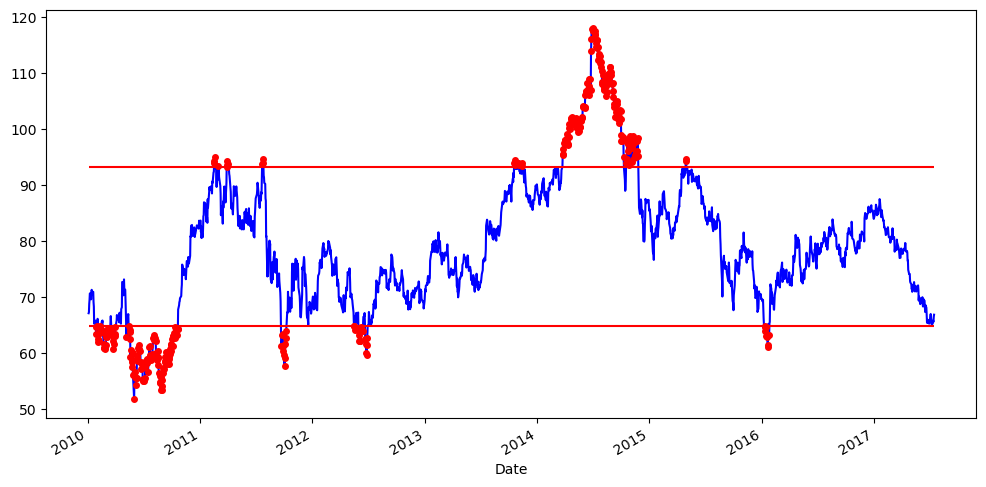

In [50]:
import matplotlib.pyplot as plt
slb_close.plot(color='b', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='r')

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')

The result of the describe method in step 2 is itself a Series with the identifying summary statistic as its index labels. This summary Series is used to store the tenth and ninetieth percentiles as their own variables. Step 3 uses boolean indexing to select only those values in the upper and lower tenth of the distribution.

Both Series and DataFrames have direct plotting capabilities through the plot method. This first call to the plot method comes from the slb_close Series, which contains all the SLB closing prices. This is the black line in the plot. The points from slb_filtered are plotted as gray markers directly on top of the closing prices. The style parameter is set to a single blank space so that no line is drawn. The ms parameter sets the marker size.

Matplotlib comes with a convenience function, hlines, that plots horizontal lines. It takes a list of y values and plots them from xmin to xmax.

Judging from our new perspective from the plots that we created, it's clear to see that although SLB's all-time high is close to $120 per share, only 10% of the trading days in the last seven years have been above $93 per share.

### There's more...

Instead of plotting red points (black points) over the closing prices to indicate the upper and lower tenth percentiles, we can use matplotlib's fill_between function. This function fills in all the areas between two lines. It takes an optional where parameter that accepts a boolean Series, alerting it to exactly which locations to fill in:



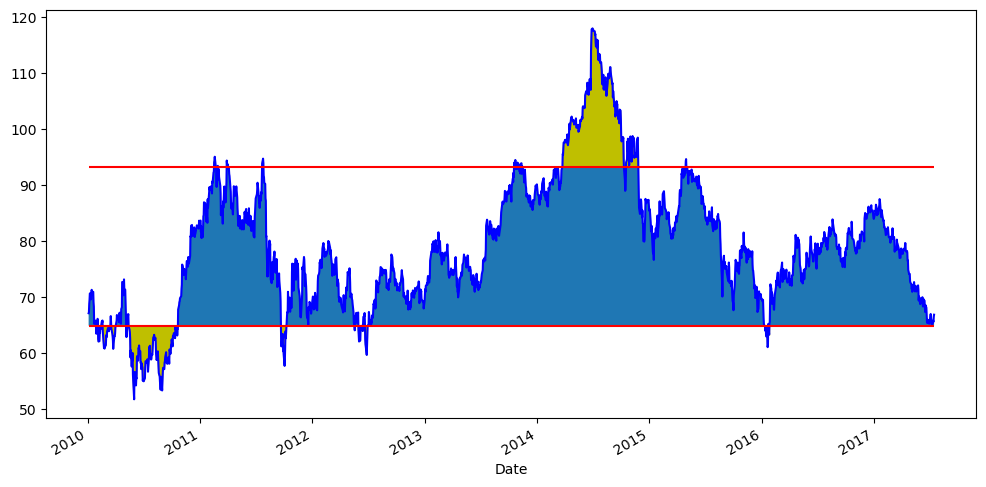

In [51]:
slb_close.plot(color='b', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='r')
plt.fill_between(criteria.index, lower_10, slb_close.values)
plt.fill_between(criteria.index, lower_10, slb_close.values, where= slb_close < lower_10, color='y')
plt.fill_between(criteria.index, upper_10, slb_close.values, where= slb_close > upper_10, color='y')

# Translating SQL WHERE clauses

Many pandas users will have a background processing data directly from databases using the ubiquitous Structured Query Language (SQL). SQL is a standardized language to define, manipulate, and control data stored in a database. The SELECT statement is the most common way to use SQL to select, filter, aggregate, and order data. Pandas has the ability to connect to databases and send SQL statements to them.

**Note**

SQL is a very important language to know for data scientists. Much of the world's data is stored in databases that necessitate SQL to retrieve, manipulate, and perform analyses on. SQL syntax is fairly simple and easy to learn. There are many different SQL implementations from companies such as Oracle, Microsoft, IBM, and more. Although the syntax is not compatible between the different implementations, the core of it will look very much the same.

### Getting ready

Within a SQL SELECT statement, the WHERE clause is very common and filters data. This recipe will write pandas code that is equivalent to a SQL query that selects a certain subset of the employee dataset.

**Note**

It is not necessary to understand any SQL syntax to make use of this recipe.

##### Suppose we are given a task to find all the female employees that work in the police or fire departments that have a base salary between 80 and 120 thousand dollars. The following SQL statement would answer this query for us:

`Copy
SELECT
    UNIQUE_ID,
    DEPARTMENT,
    GENDER,
    BASE_SALARY
FROM
    EMPLOYEE
WHERE
    DEPARTMENT IN ('Houston Police Department-HPD', 
                   'Houston Fire Department (HFD)') AND
    GENDER = 'Female' AND 
    BASE_SALARY BETWEEN 80000 AND 120000;`
    
### How to do it...

Read in the employee dataset as a DataFrame:

In [52]:
employee = pd.read_csv('data/employee.csv')

Before filtering out the data, it is helpful to do some manual inspection of each of the filtered columns to know the exact values that will be used in the filter:

In [53]:
employee.DEPARTMENT.value_counts().head()

DEPARTMENT
Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: count, dtype: int64

In [54]:
employee.GENDER.value_counts()

GENDER
Male      1397
Female     603
Name: count, dtype: int64

In [55]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

Write a single statement for each of the criteria. Use the isin method to test equality to one of many values:

In [56]:
criteria_dept = employee.DEPARTMENT.isin(['Houston Police Department-HPD', 'Houston Fire Department (HFD)'])
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & (employee.BASE_SALARY <= 120000)

Combine all the boolean Series together:

In [57]:
criteria_final = criteria_dept & criteria_gender & criteria_sal

Use boolean indexing to select only the rows that meet the final criteria:

In [58]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


Before any filtering is actually done, you will obviously need to know the exact string names that will be used. The Series value_counts method is an excellent way to get both the exact string name and number of occurrences of that value.

The isin Series method is equivalent to the SQL IN operator and accepts a list of all possible values that you would like to keep. It is possible to use a series of OR conditions to replicate this expression but it would not be as efficient or idiomatic.

The criteria for salary, criteria_sal, is formed by combining two simple inequality expressions. All the criteria are finally combined together with the pandas and operator, &, to yield a single boolean Series as the filter.

### There's more...

For many operations, pandas has multiple ways to do the same thing. In the preceding recipe, the criteria for salary uses two separate boolean expressions. Similarly to SQL, Series have a between method, with the salary criteria equivalently written as follows:



In [59]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

Another useful application of isin is to provide a sequence of values automatically generated by some other pandas statements. This would avoid any manual investigating to find the exact string names to store in a list. Conversely, let's try to exclude the rows from the top five most frequently occurring departments:

In [60]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13


The SQL equivalent of this would be as follows:

Copy
SELECT 
    * 
FROM 
    EMPLOYEE 
WHERE 
    DEPARTMENT not in 
    (
      SELECT 
          DEPARTMENT 
     FROM (
           SELECT
               DEPARTMENT,
               COUNT(1) as CT
           FROM
               EMPLOYEE
           GROUP BY
               DEPARTMENT
           ORDER BY
               CT DESC
           LIMIT 5
          )
   )
   
Notice the use of the pandas not operator, ~, which negates all boolean values of a Series.

# Determing normality of stock market returns

In elementary statistics textbooks, the normal distribution is heavily relied upon to describe many different populations of data.  Although many random processes do appear to look like normal distributions most of the time, real-life tends to be more complex. Stock market returns are a prime example of a distribution that can look fairly normal but in actuality be quite far off.

### Getting ready

This recipe describes how to find daily stock market returns of the internet retail giant Amazon and informally test whether they follow a normal distribution.

### How to do it...

Load Amazon stock data and set the date as the index:

In [61]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


Create a Series by selecting only the closing price and then using the pct_change method to get the daily rate of return:

In [62]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

Drop the missing value and plot a histogram of the returns to visually inspect the distribution:

<Axes: >

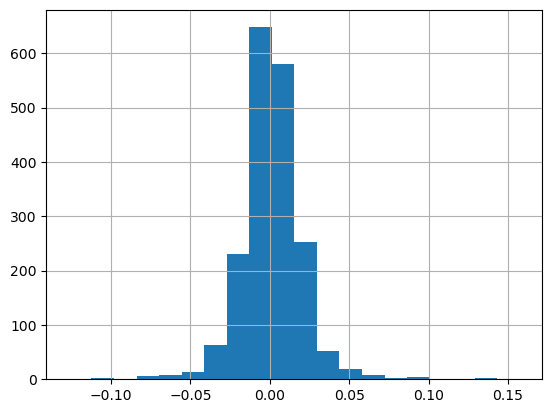

In [63]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

Normal distributions approximately follow the 68-95-99.7 rule--meaning that 68% of the data falls between 1 standard deviation of the mean, 95% between 2, and 99.7% between 3. We will now calculate the percentage of daily returns that fall between 1, 2, and 3 standard deviations from the mean. For this, we will need the mean and standard deviation:

In [64]:
mean = amzn_daily_return.mean()  
std = amzn_daily_return.std()

Calculate the absolute value of the z-score for each observation. The z-score is the number of standard deviations away from the mean:

In [65]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

Find the percentage of returns that are within 1, 2, and 3 standard deviations:

In [66]:
within_1 = abs_z_score.lt(1).mean()
within_2 = abs_z_score.lt(2).mean()
within_3 = abs_z_score.lt(3).mean()

In [67]:
print('{:.3f} fall within 1 standard deviation. '
       '{:.3f} within 2 and {:.3f} within 3'.format(within_1, within_2, within_3))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


By default, the pct_change Series method calculates the percentage change between the current element and previous element. This transforms the raw stock closing prices into daily percentage returns. The first element of the returned Series is a missing value as there is no previous price.

Histograms are fantastic plots to summarize and visualize one-dimensional numeric data. It is clear from the plot that the distribution is symmetrical but it remains difficult to determine whether it is normal or not. There are formal statistical procedures to determine the normality of a distribution but we will simply find how close the data matches the 68-95-99.7 rule.

Step 5 calculates the number of standard deviations away from the mean for each observation which is referred to as the z-score. This step uses the methods and not the symbols (- and /) to do subtraction and division. The method for less than is also used in favor of the symbols in step 6.

It may seem odd that the mean is being taken in step 6. The result of the abs_z_score.lt(1) expression is a Series of booleans. As booleans evaluate to 0 or 1, taking the mean of this Series returns the percentage of elements that are True, which is what we desired.

We can now more easily determine the normality of the returns by comparing the resulting numbers (78.7-95.7-98.5) to the 68-95-99.7 rule. The percentages deviate greatly from the rule for 1 and 3 standard deviations, and we can conclude that Amazon daily stock returns do not follow a normal distribution.

### There's more...

To automate this process, we can write a function that accepts stock data in the and outputs the histogram of daily returns along with the percentages that fall within 1, 2, and 3 standard deviations from the mean. The following function does this and replaces the methods with their symbol counterparts:



In [68]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean() 
    std = daily_return.std()
    abs_z_score = abs(daily_return - mean) / std

    within_1 = (abs_z_score < 1).mean()
    within_2 = (abs_z_score < 2).mean()
    within_3 = (abs_z_score < 3).mean()

    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(within_1, within_2, within_3))

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


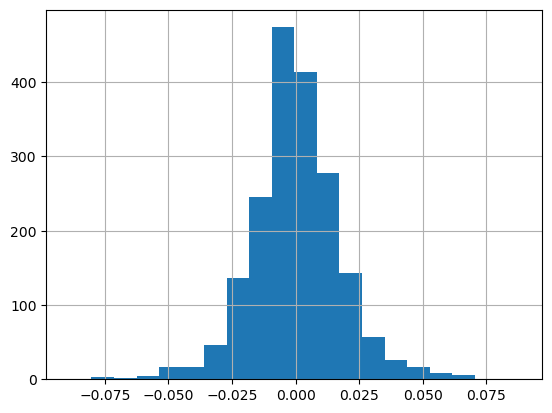

In [69]:
slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
test_return_normality(slb)

# Improving readability of boolean indexing with the query method

Boolean indexing is not necessarily the most pleasant syntax to read or write, especially when using a single line to write a complex filter. Pandas has an alternative string-based syntax through the DataFrame query method that can provide more clarity.

**Note**

The query DataFrame method is experimental and not as capable as boolean indexing and should not be used for production code.

### Getting ready

This recipe replicates the earlier recipe in this chapter, Translating SQL WHERE clauses, but instead takes advantage of the query DataFrame method. The goal here is to filter the employee data for female employees from the police or fire departments that earn a salary between 80 and 120 thousand dollars.

### How to do it...

Read in the employee data, assign the chosen departments, and import columns to variables:

In [70]:
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']

Build the query string and execute the method:

In [71]:
query_string = "DEPARTMENT in @depts " \
               "and GENDER == 'Female' " \
               "and 80000 <= BASE_SALARY <= 120000"
        
emp_filtered = employee.query(query_string)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


Strings passed to the query method are going to look more like plain English than normal pandas code. It is possible to reference Python variables using the at symbol (@) as with depts. All DataFrame column names are available in the query namespace by simply referencing their name without inner quotes. If a string is needed, such as Female, inner quotes will need to wrap it.

Another nice feature of the query syntax is the ability to write a double inequality in a single expression and its ability to understand the verbose logical operators and, or, and not instead of their bitwise equivalents as with boolean indexing.

### There's more...

Instead of manually typing in a list of department names, we could have programmatically created it. For instance, if we wanted to find all the female employees that were not a member of the top 10 departments by frequency, we can run the following code:

In [72]:
top10_depts = employee.DEPARTMENT.value_counts().index[:10].tolist()
employee_filtered2 = employee.query("DEPARTMENT not in @top10_depts and GENDER == 'Female'")
employee_filtered2[['DEPARTMENT', 'GENDER']].head()

,DEPARTMENT,GENDER
0,Municipal Courts Department,Female
73,Human Resources Dept.,Female
96,City Controller's Office,Female
117,Legal Department,Female
146,Houston Information Tech Svcs,Female


# Preserving DataFrames with the where method

`Boolean indexing necessarily filters your dataset by removing all the rows that don't match the criteria. Instead of dropping all these values, it is possible to keep them using the where method. The where method preserves the size of your Series or DataFrame and either sets the values that don't meet the criteria to missing or replaces them with something else.`

### Getting ready

In this recipe, we pass the where method boolean conditions to put a floor and ceiling on the minimum and maximum number of Facebook likes for actor 1 in the movie dataset.

### How to do it...

Read the movie dataset, set the movie title as the index, and select all the values in the actor_1_facebook_likes column that are not missing:

In [73]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
facebook_likes = movie['actor_1_facebook_likes'].dropna()
facebook_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

Let's use the describe method to get a sense of the distribution:

In [74]:
facebook_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

In [75]:
facebook_likes.describe(percentiles=[.1,.25,.5,.75,.9])

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
10%         240.000000
25%         607.000000
50%         982.000000
75%       11000.000000
90%       18000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

Additionally, we may plot a histogram of this Series to visually inspect the distribution:

<Axes: >

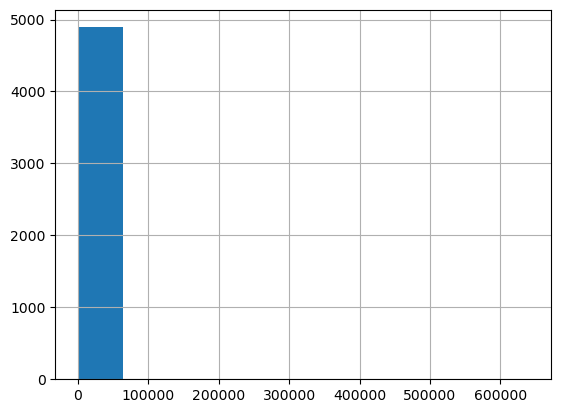

In [76]:
facebook_likes.hist()

This is quite a bad visualization and very difficult to get a sense of the distribution. On the other hand, the summary statistics from step 2 appear to be telling us that it is highly skewed to the right with many observations more than an order of magnitude greater than the median. Let's create criteria to test whether the number of likes is less than 20,000:

In [77]:
criteria_high = facebook_likes < 20000
criteria_high.mean()

0.9085353432470972

About 91% of the movies have an actor 1 with fewer than 20,000 likes. We will now use the where method, which accepts a boolean condition. The default behavior is to return a Series the same size as the original but which has all the False locations replaced with a missing value:

In [78]:
facebook_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

The second parameter to the where method, other, allows you to control the replacement value. Let's change all the missing values to 20,000:

In [79]:
facebook_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

Similarly, we can create criteria to put a floor on the minimum number of likes. Here, we chain another where method and replace the values not meeting with the condition to 300:

In [80]:
criteria_low = facebook_likes > 300
facebook_likes_cap = facebook_likes.where(criteria_high, other=20000)\
                                   .where(criteria_low, 300)
facebook_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

The length of the original Series and modified Series is the same:

In [81]:
len(facebook_likes), len(facebook_likes_cap)

(4909, 4909)

Let's make a histogram with the modified Series. With the data in a much tighter range, it should produce a better plot:

<Axes: >

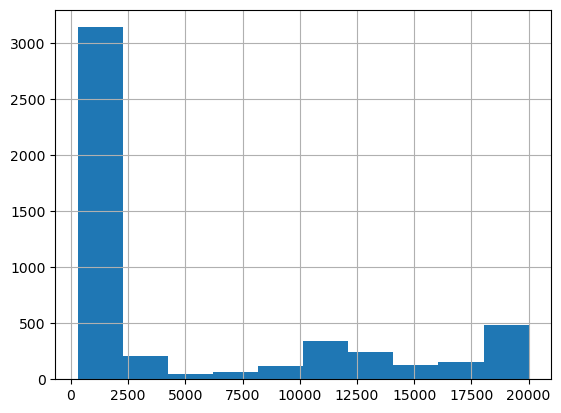

In [82]:
facebook_likes_cap.hist()

The where method again preserves the size and shape of the calling object and does not modify the values where the passed boolean is True. It was important to drop the missing values in step 1 as the where method would have eventually replaced them with a valid number in future steps.

The summary statistics in step 2 give us some intuition where it would make sense to cap our data. The histogram from step 3, on the other hand, appears to clump all the data into one bin. The data has too many outliers for a plain histogram to make a good plot. The where method allows us to place a ceiling and floor on our data, which results in a histogram with many more visible bars.

### There's more...

Pandas actually has built-in methods clip, clip_lower, and clip_upper that replicate this operation. The clip method can set a floor and ceiling at the same time. We also check whether this alternate method produces the exact same Series, which it does:



In [83]:
facebook_likes_cap2 = facebook_likes.clip(lower=300, upper=20000)
facebook_likes_cap2.equals(facebook_likes_cap)

True

# Masking DataFrame rows

The mask method performs the exact opposite operation that the where method does. By default, it creates missing values wherever the boolean condition is True. In essence, it is literally masking, or covering up, values in your dataset.

### Getting ready

In this recipe, we will mask all rows of the movie dataset that were made after 2010 and then filter all the rows with missing values.

### How to do it...

Read the movie dataset, set the movie title as the index, and create the criteria:

In [84]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
criteria = (movie['title_year'] >= 2010) | (movie['title_year'].isnull())

Use the mask method on a DataFrame to make all the values in rows with movies that were made from 2010 onward missing. Any movie that originally had a missing value for title_year is also masked:


In [85]:
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice how all the values in the third, fourth, and fifth rows from the preceding DataFrame are missing. Chain the dropna method to remove rows that have all values missing:

In [86]:
movie_mask_filtered = movie.mask(criteria).dropna(how='all')
movie_mask_filtered.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,383056.0,46055.0,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,321795.0,58753.0,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,240396.0,29991.0,Frank Langella,0.0,crystal|epic|lex luthor|lois lane|return to earth,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


The operation in step 3 is just a complex way of doing basic boolean indexing. We can check whether the two methods produce the same DataFrame:

In [87]:
movie_boolean_filtered = movie[movie['title_year'] < 2010]
movie_boolean_filtered.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,Kevin Spacey,240396,29991,Frank Langella,0.0,crystal|epic|lex luthor|lois lane|return to earth,http://www.imdb.com/title/tt0348150/?ref_=fn_t...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0


In [88]:
movie_mask_filtered.equals(movie_boolean_filtered)

False

The equals method is telling us that they aren't equal. Something is wrong. Let's do some sanity checking and see if they are the same shape:

In [89]:
movie_mask_filtered.shape == movie_boolean_filtered.shape

True

When we used the preceding mask method, it created many missing values. Missing values are float data types so any previous integer column is now a float. The equals method returns False if the data types of the columns are different, even if the values are the same. Let's check the equality of the data types to see whether this scenario happened:

In [90]:
movie_mask_filtered.dtypes == movie_boolean_filtered.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

It turns out that a couple of columns don't have the same data type. Pandas has an alternative for these situations. In its testing module, which is primarily used by developers, there is a function, assert_frame_equal, that allows you to check the equality of Series and DataFrames without also checking the equality of the data types:

In [91]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean_filtered, movie_mask_filtered, check_dtype=False)

By default, the mask method covers up data with missing values. The first parameter to the mask method is the condition which is often a boolean Series such as criteria. Because the mask method is called from a DataFrame, all the values in each row where the condition is False change to missing. Step 3 uses this masked DataFrame to drop the rows that contain all missing values. Step 4 shows how to do this same procedure with boolean indexing.

During a data analysis, it is very important to continually validate results. Checking the equality of Series and DataFrames is an extremely common approach to validation. Our first attempt, in step 4, yielded an unexpected result. Some basic sanity checking, such as ensuring that the number of rows and columns are the same or that the row and column names are the same, are good checks before going deeper.

Step 6 compares the two Series of data types together. It is here where we uncover the reason why the DataFrames were not equivalent. The equals method checks that both the values and data types are the same. The assert_frame_equal function from step 7 has many available parameters to test equality in a variety of ways. Notice that there is no output after calling assert_frame_equal. This method returns None when the two passed DataFrames are equal and raises an error when they are not.

### There's more...

Let's compare the speed difference between masking and dropping missing rows and boolean indexing. Boolean indexing is about an order of magnitude faster in this case:



In [92]:
%timeit movie.mask(criteria).dropna(how='all')

7.2 ms ± 351 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
%timeit movie[movie['title_year'] < 2010]

813 µs ± 29.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Selecting with booleans, integer location and labels

Chapter 4, Selecting Subsets of Data, covered a wide range of recipes on selecting different subsets of data through the .iloc and .loc indexers. Both these indexers select rows and columns simultaneously by either integer location or label. Both these indexers can also do data selection through boolean indexing, even though booleans are not integers and not labels.

### Getting ready

In this recipe, we will filter both rows and columns with boolean indexing for both the .iloc and .loc indexers.

### How to do it...

Read in the movie dataset, set the index as the title, and then create a boolean Series matching all movies with a content rating of G and an IMDB score less than 4:

In [94]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
criteria = (movie['content_rating'] == 'G') & (movie['imdb_score'] < 4)

Let's first pass these criteria to the .loc indexer to filter the rows:

In [95]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,Yolande Moreau,753,53,Jérôme Deschamps,0.0,cartoon cat|cat|character name in title|puss i...,http://www.imdb.com/title/tt1239462/?ref_=fn_t...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,Jimmy Fallon,3851,2185,Jon Stewart,0.0,diamond|lava|magic|mountain|sorcerer,http://www.imdb.com/title/tt0763304/?ref_=fn_t...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,Mara Wilson,2855,2429,Peter Fonda,1.0,locomotive|magic|mountain|railroad|steam locom...,http://www.imdb.com/title/tt0205461/?ref_=fn_t...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,Trevor Morgan,2724,1139,Shirley Douglas,0.0,apostrophe in title|critically bashed|hit on t...,http://www.imdb.com/title/tt0120598/?ref_=fn_t...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_t...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


Let's check whether this DataFrame is exactly equal to the one generated directly from the indexing operator:

In [96]:
movie_loc.equals(movie[criteria])

True

Now let's attempt the same boolean indexing with the .iloc indexer:

In [97]:
movie_iloc = movie.iloc[criteria]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

It turns out that we cannot directly use a Series of booleans because of the index. We can, however, use an ndarray of booleans. To extract the array, use the values attribute:

In [98]:
movie_iloc = movie.iloc[criteria.values]

In [99]:
movie_iloc.equals(movie_loc)

True

In [100]:
movie.loc[criteria.values]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,Yolande Moreau,753,53,Jérôme Deschamps,0.0,cartoon cat|cat|character name in title|puss i...,http://www.imdb.com/title/tt1239462/?ref_=fn_t...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,Jimmy Fallon,3851,2185,Jon Stewart,0.0,diamond|lava|magic|mountain|sorcerer,http://www.imdb.com/title/tt0763304/?ref_=fn_t...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,Mara Wilson,2855,2429,Peter Fonda,1.0,locomotive|magic|mountain|railroad|steam locom...,http://www.imdb.com/title/tt0205461/?ref_=fn_t...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,Trevor Morgan,2724,1139,Shirley Douglas,0.0,apostrophe in title|critically bashed|hit on t...,http://www.imdb.com/title/tt0120598/?ref_=fn_t...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_t...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000
Sunday School Musical,Color,Rachel Goldenberg,5.0,93.0,7.0,73.0,Mark Hengst,349.0,NaN,Drama|Musical,Dustin Fitzsimons,602,631,Debra Lynn Hull,0.0,church|competition|high school|new school|pastor,http://www.imdb.com/title/tt1270792/?ref_=fn_t...,18.0,English,USA,G,NaN,2008.0,168.0,2.5,1.85,777


Although not very common, it is possible to do boolean indexing to select particular columns. Here, we select all the columns that have a data type of 64-bit integers:

In [101]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [102]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


As criteria_col is a Series, which always has an index, you must use the underlying ndarray to make it work with .iloc. The following produces the same result as step 6.

In [103]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


A boolean Series may be used to select rows and then simultaneously select columns with either integers or labels. Remember, you need to put a comma between the row and column selections. Let's keep the row criteria and select content_rating, imdb_score, title_year, and gross:

In [104]:
movie.loc[criteria, ['content_rating', 'imdb_score', 'title_year', 'gross']].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


This same operation may be replicated with .iloc, but you need to get the integer location of all the columns:


In [105]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [106]:
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


## How it works

Boolean indexing may be accomplished with both the .iloc and .loc indexers with the caveat that .iloc cannot be passed a Series but the underlying ndarray. Let's take a look at the one-dimensional ndarray underlying the criteria Series:

In [107]:
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [108]:
len(a), len(criteria)

(4916, 4916)

The array is the same length as the Series, which is the same length as the movie DataFrame. The integer location for the boolean array aligns with the integer location of the DataFrame and the filter happens as expected. These arrays also work with the .loc operator as well but they are a necessity for .iloc.

Steps 6 and 7 show how to filter by columns instead of by rows. The colon, :, is needed to indicate the selection of all the rows. The comma following the colon separates the row and column selections. There is actually a much easier way to select columns with integer data types and that is through the select_dtypes method.

Steps 8 and 9 show a very common and useful way to do boolean indexing on the row and column selections simultaneously. You simply place a comma between the row and column selections. Step 9 uses a list comprehension to loop through all the desired column names to find their integer location with the index method get_loc.

### There's more...

It is actually possible to pass arrays and lists of booleans to Series objects that are not the same length as the DataFrame you are doing the indexing on. Let's look at an example of this by selecting the first and third rows, and the first and fourth columns:

In [109]:
movie.loc[[True, False, True], [True, False, False, True]]

IndexError: Boolean index has wrong length: 4 instead of 27

Both of the boolean lists are not the same length as the axis they are indexing. The rest of the rows and columns not explicitly given a boolean value in the lists are dropped.